In [1]:
import matplotlib.pyplot as plt
import cv2

import scipy

from pathlib import Path

import numpy as np

import h5py
import math

import pandas as pd

import holoviews as hv

import sys
sys.path.insert(0, "..")

from pathlib import Path

import cv2


from Utilities.Utils import *
from Utilities.Processing import *

In [3]:
# This is a function to load the ball coordinates from the .analysis.h5 file

filename ="/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.001_arena1_corridor_2.analysis.h5"
with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

With multiple h5 files

In [2]:
inputfolder = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/")

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

df = pd.DataFrame(columns=["yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

for file in inputfolder.glob("*.analysis.h5"):
    print(file)
    with h5py.File(file, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]

    locations.shape

    yball : np.ndarray = locations[:, :, 1, :]

   

    # Get the arena and corridor numbers from the filename
    filename = file.name
    arena = filename.split("_")[4]
    corridor = filename.split("_")[5] + filename.split("_")[6][0]

     # If arena is 4, 5 or 6, revert the y coordinates
    if arena == "arena2" or arena == "arena5" or arena == "arena8":
        yball[:, 0, 0] = -yball[:, 0, 0]
    
    # Store the ball y positions and the arena and corridor numbers as metadata
    df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
    
# Unpack yball positions

df = df.explode("yball")
df['time'] = df.groupby(['arena', 'corridor']).cumcount() / 30

df['Fly'] = 'Fly' + (df.groupby(['arena', 'corridor']).ngroup() + 1).astype(str)

df.head()

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena1_corridor_1-stitched_tracked.000_arena1_corridor_1-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena1_corridor_2-stitched_tracked.000_arena1_corridor_2-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena1_corridor_3-stitched_tracked.000_arena1_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena1_corridor_4-stitched_tracked.000_arena1_corridor_4-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena1_corridor_5-stitched_tracked.000_arena1_corridor_5-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena1_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena2_corridor_1-stitched_tracked.000_arena2_corridor_1-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena2_corridor_2-stitched_tracked.000_arena2_corridor_2-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena2_corridor_3-stitched_tracked.000_arena2_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena2_corridor_4-stitched_tracked.000_arena2_corridor_4-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena2_corridor_5-stitched_tracked.000_arena2_corridor_5-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena2_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena3_corridor_2-stitched_tracked.000_arena3_corridor_2-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena3_corridor_3-stitched_tracked.000_arena3_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena3_corridor_4-stitched_tracked.000_arena3_corridor_4-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena3_corridor_5-stitched_tracked.000_arena3_corridor_5-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena3_corridor_6-stitched_tracked.000_arena3_corridor_6-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena4_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena4_corridor_3-stitched_tracked.000_arena4_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena4_corridor_4-stitched_tracked.000_arena4_corridor_4-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena4_corridor_5-stitched_tracked.000_arena4_corridor_5-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena4_corridor_6-stitched_tracked.000_arena4_corridor_6-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena5_corridor_1-stitched_tracked.000_arena5_corridor_1-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena5_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena5_corridor_5-stitched_tracked.000_arena5_corridor_5-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena5_corridor_6-stitched_tracked.000_arena5_corridor_6-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena6_corridor_1-stitched_tracked.000_arena6_corridor_1-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena6_corridor_2-stitched_tracked.000_arena6_corridor_2-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena6_corridor_3-stitched_tracked.000_arena6_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena6_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena6_corridor_6-stitched_tracked.000_arena6_corridor_6-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena7_corridor_1-stitched_tracked.000_arena7_corridor_1-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena7_corridor_2-stitched_tracked.000_arena7_corridor_2-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena7_corridor_3-stitched_tracked.000_arena7_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena7_corridor_4-stitched_tracked.000_arena7_corridor_4-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena7_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena8_corridor_1-stitched_tracked.000_arena8_corridor_1-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena8_corridor_2-stitched_tracked.000_arena8_corridor_2-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena8_corridor_3-stitched_tracked.000_arena8_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena8_corridor_4-stitched_tracked.000_arena8_corridor_4-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena8_corridor_5-stitched_tracked.000_arena8_corridor_5-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena8_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena9_corridor_1-stitched_tracked.000_arena9_corridor_1-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena9_corridor_2-stitched_tracked.000_arena9_corridor_2-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena9_corridor_3-stitched_tracked.000_arena9_corridor_3-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena9_corridor_4-stitched_tracked.000_arena9_corridor_4-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena9_corridor_5-stitched_tracked.000_arena9_corridor_5-stitched.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/Tests1_2_Merged/arena9_corridor_

/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_134479/3244044616.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

,yball,arena,corridor,time,Fly
0,155.907578,arena1,corridor1,0.000000,Fly1
0,155.959412,arena1,corridor1,0.033333,Fly1
0,155.94429,arena1,corridor1,0.066667,Fly1
0,155.922791,arena1,corridor1,0.100000,Fly1
0,155.956711,arena1,corridor1,0.133333,Fly1


In [4]:
# Get the corresponding video path
video_path = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/Test2_Videos/Videos_NumOrdered/arena1_corridor_2.mp4")

outpath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/LabeledTest.mp4")

In [13]:
locations[0][0][0]

array([49.07754984])

In [11]:
# For the first 15O frames of the video, plot the ball coordinates

startFrame = 4000   # only variables you need to change to run the code
endFrame = 6600     # start and end frame of the abstract that you want to record

videoCapture = cv2.VideoCapture(video_path.as_posix()) #TODO change the pathname

# Make a video writer
fps = 30
frameSize = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(outpath.as_posix(), fourcc, fps, frameSize)



# Read the video and for each frame plot a circle at the ball coordinates
frameNumber = 0
while True:
    ret, frame = videoCapture.read()
    if not ret:
        break

    frameNumber += 1
    print(frameNumber)

    if startFrame <= frameNumber <= endFrame:

        # get the skeleton of the frame
        cv2.circle(frame, (int(locations[frameNumber][0][0]), int(locations[frameNumber][0][1])), 5, (0, 0, 255), -1)
        #cv2.imshow("frame", frame)
        out.write(frame)

    if frameNumber > endFrame:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  # to quit the video press q
    
    
videoCapture.release()
out.release()
cv2.destroyAllWindows()
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
ImagePath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/Test2/image0.jpg")



img = cv2.imread(ImagePath.as_posix())

In [ ]:
locations.shape

In [ ]:
yball : np.ndarray = locations[:, :, 1, :]

In [ ]:
# plot the y coordinates of the ball
plt.plot(yball[:, 0, 0])

In [5]:
inputfolder = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/")

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

df = pd.DataFrame(columns=["yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

for file in inputfolder.glob("*.analysis.h5"):
    print(file)
    with h5py.File(file, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]

    locations.shape

    yball : np.ndarray = locations[:, :, 1, :]

   

    # Get the arena and corridor numbers from the filename
    filename = file.name
    arena = filename.split("_")[4]
    corridor = filename.split("_")[5] + filename.split("_")[6][0]

     # If arena is 4, 5 or 6, revert the y coordinates
    if arena == "arena2" or arena == "arena5" or arena == "arena8":
        yball[:, 0, 0] = -yball[:, 0, 0]
    
    # Store the ball y positions and the arena and corridor numbers as metadata
    df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
    
# Unpack yball positions

df = df.explode("yball")
df['time'] = df.groupby(['arena', 'corridor']).cumcount() / 30

df['Fly'] = 'Fly' + (df.groupby(['arena', 'corridor']).ngroup() + 1).astype(str)

df.head()
    





/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.000_arena1_corridor_1.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.001_arena1_corridor_2.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.002_arena1_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.003_arena1_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.004_arena1_corridor_5.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.005_arena1_corridor_6.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.006_arena2_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.007_arena2_corridor_2.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.008_arena2_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.009_arena2_corridor_4.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.010_arena2_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.011_arena2_corridor_6.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.012_arena3_corridor_1.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.013_arena3_corridor_2.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.014_arena3_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.015_arena3_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.016_arena3_corridor_5.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.017_arena3_corridor_6.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.018_arena4_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.019_arena4_corridor_2.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.020_arena4_corridor_3.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.021_arena4_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.022_arena4_corridor_5.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.023_arena4_corridor_6.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.024_arena5_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.025_arena5_corridor_2.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.026_arena5_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.027_arena5_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.028_arena5_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.029_arena5_corridor_6.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.030_arena6_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.031_arena6_corridor_2.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.032_arena6_corridor_3.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.033_arena6_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.034_arena6_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.035_arena6_corridor_6.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.036_arena7_corridor_1.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.037_arena7_corridor_2.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.038_arena7_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.039_arena7_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.040_arena7_corridor_5.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.041_arena7_corridor_6.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.042_arena8_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.043_arena8_corridor_2.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.044_arena8_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.045_arena8_corridor_4.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.046_arena8_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.047_arena8_corridor_6.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.048_arena9_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.049_arena9_corridor_2.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.050_arena9_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.051_arena9_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.052_arena9_corridor_5.analysis.h5


/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_84296/1552507551.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/FirstExp/labels_centres_.v001_230602.053_arena9_corridor_6.analysis.h5


,yball,arena,corridor,time,Fly
0,190.413092,arena1,corridor1,0.000000,Fly1
0,190.228958,arena1,corridor1,0.033333,Fly1
0,190.221695,arena1,corridor1,0.066667,Fly1
0,190.205246,arena1,corridor1,0.100000,Fly1
0,190.198639,arena1,corridor1,0.133333,Fly1


In [3]:
# Get the first value of yball for each arena and corridor

df_first = df.groupby(['arena', 'corridor']).first().reset_index()

# Same for last value

df_last = df.groupby(['arena', 'corridor']).last().reset_index()

In [3]:
cutoff = 0.01  # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
order = 1  # sin wave can be approx represented as quadratic

df['ysmooth'] = butter_lowpass_filter(df['yball'], cutoff, order)

In [4]:
# Make new column where for each fly the lowest yball value is 0 and the rest is relative to that

df['yball_relative'] = df['yball'] - df_first['yball']

In [5]:
Grouped = df.groupby(['time',]).mean().reset_index()

/tmp/ipykernel_134479/4075517423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Grouped = df.groupby(['time',]).mean().reset_index()


In [6]:
Confints = df.groupby(['time'])['yball_relative'].apply(lambda x: draw_bs_ci(x, n_reps=300))

In [7]:
Confints_process = Confints.reset_index()

# Split values of Confints_process["cumulated_success"] into two columns ci_lower and ci_upper
Confints_process[["ci_lower", "ci_upper"]] = pd.DataFrame(
    Confints_process["yball_relative"].tolist(), index=Confints_process.index
)


In [8]:

Grouped["ci_lower"] = Confints_process["ci_lower"]
Grouped["ci_upper"] = Confints_process["ci_upper"]

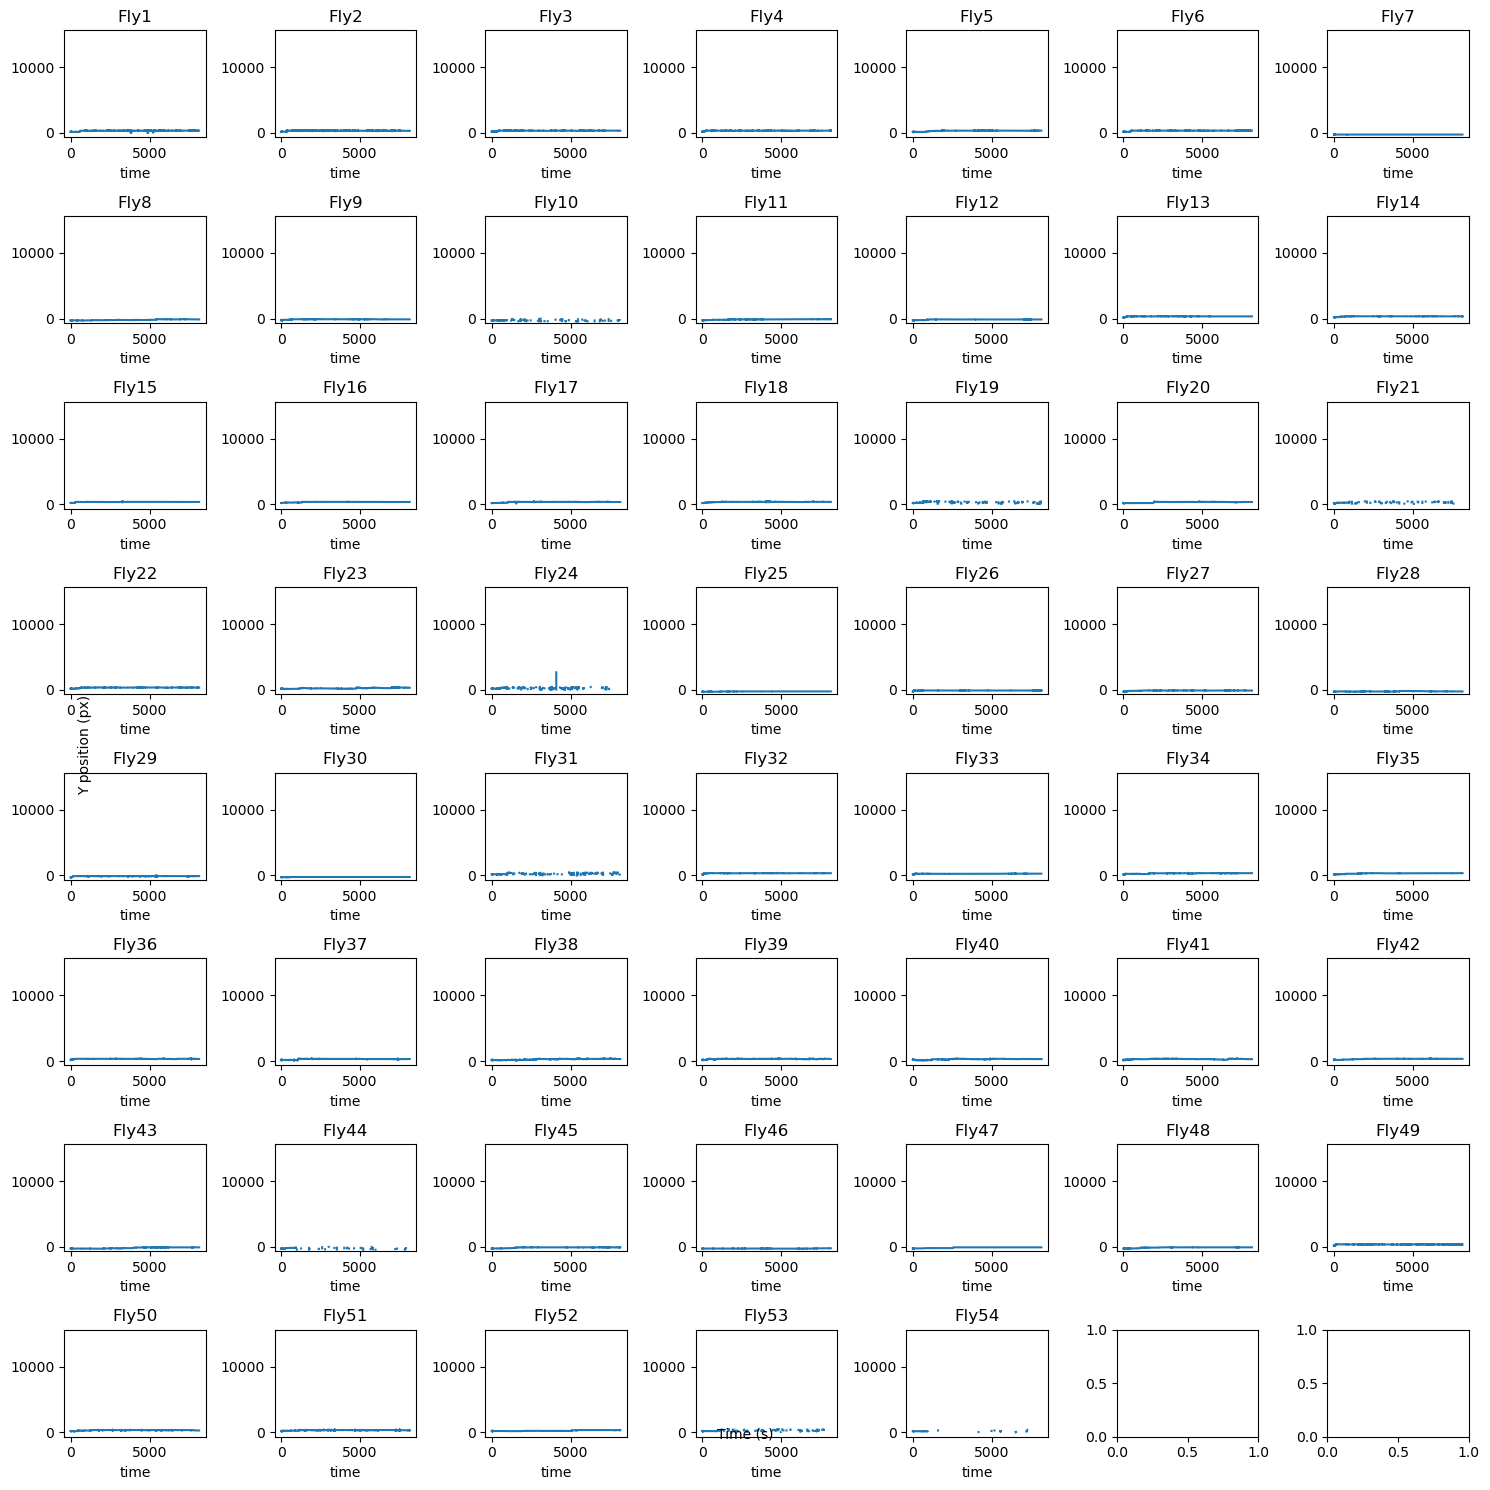

In [9]:
# Plot the ball y positions as function of time for each fly and display it as a grid with matplotlib

Flynum = 54

# Compute the number of rows and columns for the grid
nrows = math.ceil(math.sqrt(Flynum))
ncols = math.ceil(Flynum / nrows)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()

# Find the minimum and maximum y values across all subplots
ymin = df['yball'].min()
ymax = df['yball'].max()

for i, fly in enumerate(df['Fly'].unique()):
    df[df['Fly'] == fly].plot(x='time', y='yball', ax=axs[i], title=fly, legend=False)
    axs[i].set_ylim(ymin, ymax)
    
# Set the same x and y labels for all subplots
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.text(0.06, 0.5, 'Y position (px)', ha='center', va='center', rotation='vertical')
    
plt.tight_layout()

/tmp/ipykernel_134479/3799880525.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('time').mean().reset_index()


Text(0, 0.5, 'Mean relative yball position (px)')

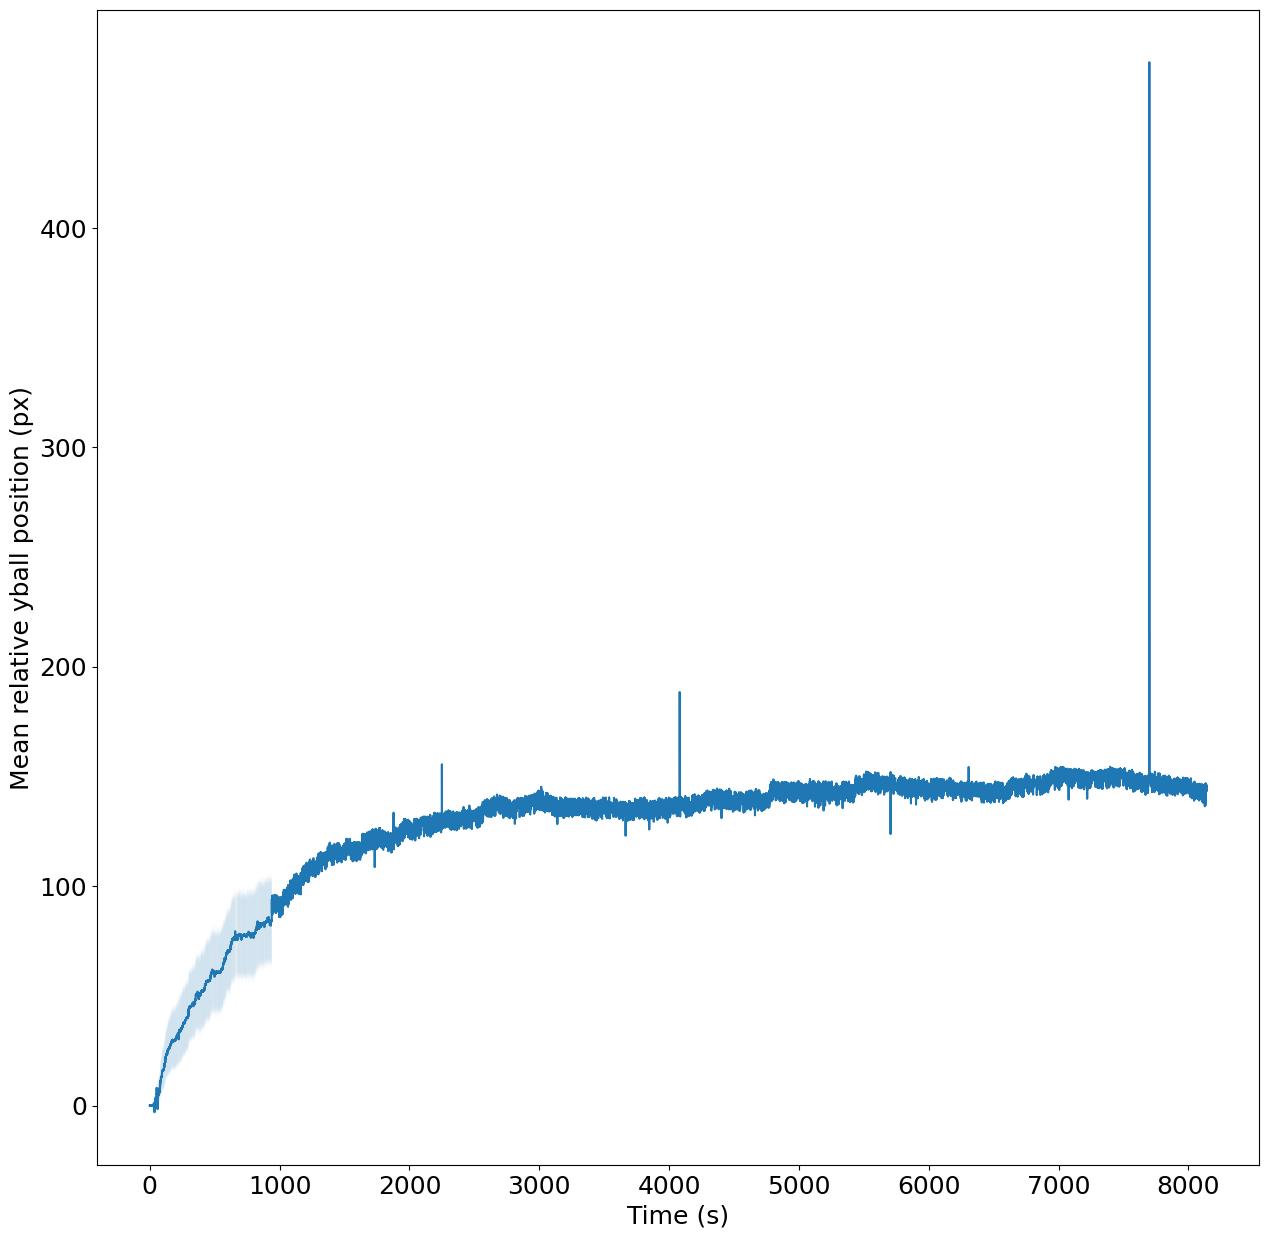

In [10]:
# Adjust plot size to make everything bigger
plt.rcParams['figure.figsize'] = [15, 15]
# Change font size accordingly
plt.rcParams.update({'font.size': 18})

# Compute mean relative yball position across flies for each time point
df_mean = df.groupby('time').mean().reset_index()

# Compute upper and lower confidence intervals
# (replace this with your own code to compute the confidence intervals)
upper = Grouped['ci_upper']
lower = Grouped['ci_lower']

# Plot the mean relative yball position as function of time and display it
plt.plot(df_mean['time'], df_mean['yball_relative'])
plt.fill_between(df_mean['time'], lower, upper, alpha=0.2)
plt.xlabel('Time (s)')
plt.ylabel('Mean relative yball position (px)')

In [ ]:
grouped = df.groupby('Fly')
for name, group in grouped:
    print(name)
    print(group)

In [2]:
inputfolder2 = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full")


In [3]:

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

df2 = pd.DataFrame(columns=["yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

for file in inputfolder2.glob("*.analysis.h5"):
    print(file)
    with h5py.File(file, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]

    locations.shape

    yball : np.ndarray = locations[:, :, 1, :]

   

    # Get the arena and corridor numbers from the filename
    filename = file.name
    arena = filename.split("_")[4]
    corridor = filename.split("_")[5] + filename.split("_")[6][0]

     # If arena is 4, 5 or 6, revert the y coordinates
    #if arena == "arena2" or arena == "arena5" or arena == "arena8":
    if arena == "arena1" or arena == "arena3" or arena == "arena4" or arena == "arena6" or arena == "arena7" or arena == "arena9":
        yball[:, 0, 0] = -yball[:, 0, 0]
    
    # Store the ball y positions and the arena and corridor numbers as metadata
    df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
    
# Unpack yball positions

df2 = df2.explode("yball")
df2['time'] = df2.groupby(['arena', 'corridor']).cumcount() / 30

df2['Fly'] = 'Fly' + (df2.groupby(['arena', 'corridor']).ngroup() + 1).astype(str)

df2.head()

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena1_corridor_1_tracked.000_arena1_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena1_corridor_2_tracked.000_arena1_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena1_corridor_3_tracked.000_arena1_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena1_corridor_4_tracked.000_arena1_corridor_4.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena1_corridor_5_tracked.000_arena1_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena1_corridor_6_tracked.000_arena1_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena2_corridor_1_tracked.000_arena2_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena2_corridor_2_tracked.000_arena2_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena2_corridor_3_tracked.000_arena2_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena2_corridor_4_tracked.000_arena2_corridor_4.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena2_corridor_5_tracked.000_arena2_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena2_corridor_6_tracked.000_arena2_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena3_corridor_1_tracked.000_arena3_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena3_corridor_2_tracked.000_arena3_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena3_corridor_3_tracked.000_arena3_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena3_corridor_4_tracked.000_arena3_corridor_4.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena3_corridor_5_tracked.000_arena3_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena3_corridor_6_tracked.000_arena3_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena4_corridor_1_tracked.000_arena4_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena4_corridor_2_tracked.000_arena4_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena4_corridor_3_tracked.000_arena4_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena4_corridor_4_tracked.000_arena4_corridor_4.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena4_corridor_5_tracked.000_arena4_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena4_corridor_6_tracked.000_arena4_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena5_corridor_1_tracked.000_arena5_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena5_corridor_2_tracked.000_arena5_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena5_corridor_3_tracked.000_arena5_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena5_corridor_4_tracked.000_arena5_corridor_4.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena5_corridor_5_tracked.000_arena5_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena5_corridor_6_tracked.000_arena5_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena6_corridor_1_tracked.000_arena6_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena6_corridor_2_tracked.000_arena6_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena6_corridor_3_tracked.000_arena6_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena6_corridor_4_tracked.000_arena6_corridor_4.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena6_corridor_5_tracked.000_arena6_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena6_corridor_6_tracked.000_arena6_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena7_corridor_1_tracked.000_arena7_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena7_corridor_2_tracked.000_arena7_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena7_corridor_3_tracked.000_arena7_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena7_corridor_4_tracked.000_arena7_corridor_4.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena7_corridor_5_tracked.000_arena7_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena7_corridor_6_tracked.000_arena7_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena8_corridor_1_tracked.000_arena8_corridor_1.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena8_corridor_2_tracked.000_arena8_corridor_2.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena8_corridor_3_tracked.000_arena8_corridor_3.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena8_corridor_4_tracked.000_arena8_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena8_corridor_5_tracked.000_arena8_corridor_5.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena8_corridor_6_tracked.000_arena8_corridor_6.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena9_corridor_1_tracked.000_arena9_corridor_1.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena9_corridor_2_tracked.000_arena9_corridor_2.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena9_corridor_3_tracked.000_arena9_corridor_3.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena9_corridor_4_tracked.000_arena9_corridor_4.analysis.h5
/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena9_corridor_5_tracked.000_arena9_corridor_5.analysis.h5


/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)
/tmp/ipykernel_161223/2685091626.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"yball": yball[:, 0, 0], "arena": arena, "corridor": corridor}, ignore_index=True)


/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Sleap/Datasets/230606_DarkishTest_Full/arena9_corridor_6_tracked.000_arena9_corridor_6.analysis.h5


,yball,arena,corridor,time,Fly
0,-266.177582,arena1,corridor1,0.000000,Fly1
0,-266.140137,arena1,corridor1,0.033333,Fly1
0,-266.088318,arena1,corridor1,0.066667,Fly1
0,-266.048004,arena1,corridor1,0.100000,Fly1
0,-266.100464,arena1,corridor1,0.133333,Fly1


In [4]:
# Get the first value of yball for each arena and corridor

df2_first = df2.groupby(['arena', 'corridor']).first().reset_index()

# Same for last value

df2_last = df2.groupby(['arena', 'corridor']).last().reset_index()

In [5]:
# Make new column where for each fly the lowest yball value is 0 and the rest is relative to that

df2['yball_relative'] = df2['yball'] - df2_first['yball']

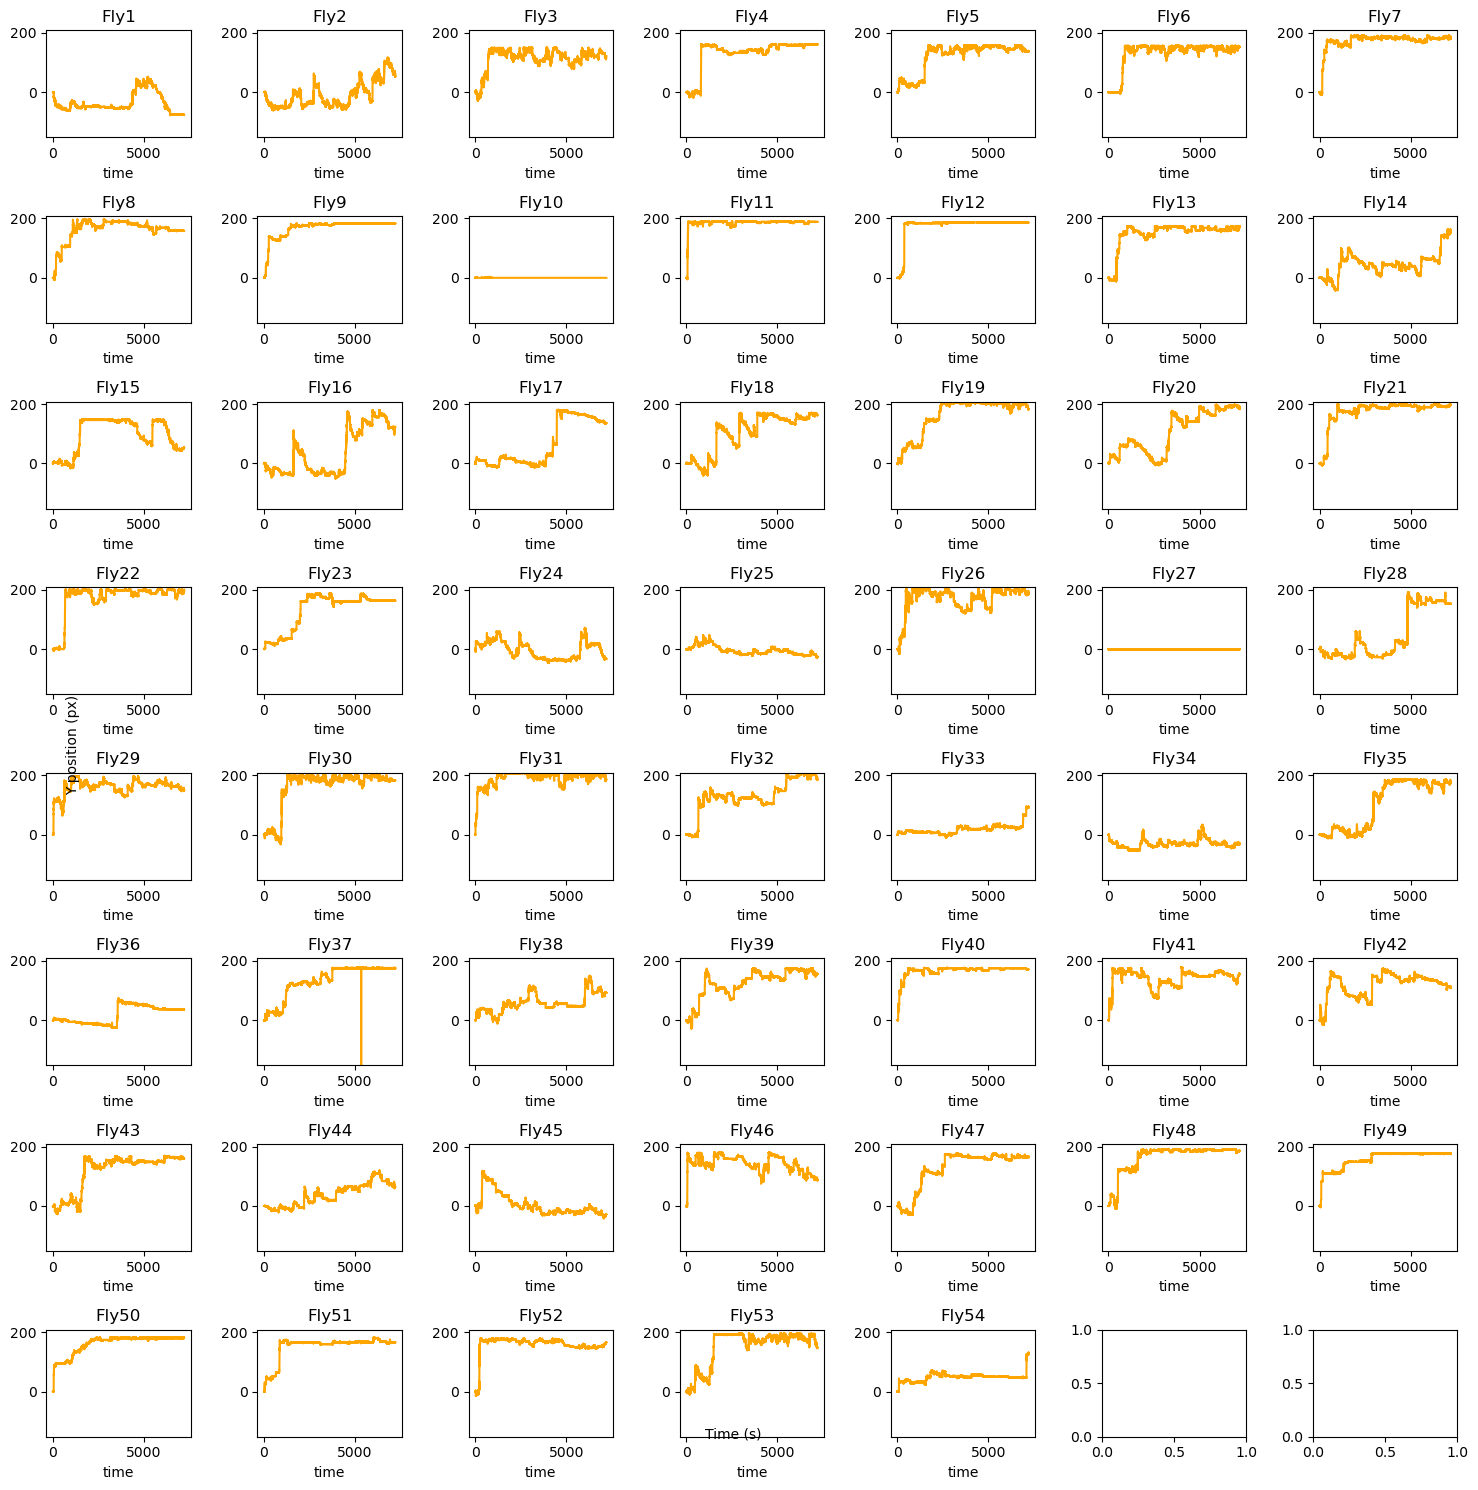

In [6]:
# Plot the ball y positions as function of time for each fly and display it as a grid with matplotlib

Flynum = 54

# Compute the number of rows and columns for the grid
nrows = math.ceil(math.sqrt(Flynum))
ncols = math.ceil(Flynum / nrows)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
axs = axs.flatten()

# Find the minimum and maximum y values across all subplots
ymin = df2['yball_relative'].min()
ymax = df2['yball_relative'].max()

for i, fly in enumerate(df2['Fly'].unique()):
    df2[df2['Fly'] == fly].plot(x='time', y='yball_relative', ax=axs[i], title=fly, legend=False, color='orange')
    axs[i].set_ylim(ymin, ymax)
    
# Set the same x and y labels for all subplots
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.text(0.06, 0.5, 'Y position (px)', ha='center', va='center', rotation='vertical')
    
plt.tight_layout()

In [7]:
Grouped2 = df2.groupby(['time',]).mean().reset_index()



/tmp/ipykernel_161223/1031203727.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Grouped2 = df2.groupby(['time',]).mean().reset_index()


In [8]:
Confints2 = df2.groupby(['time'])['yball_relative'].apply(lambda x: draw_bs_ci(x, n_reps=300))


In [9]:

Confints_process2 = Confints2.reset_index()



In [10]:
# Split values of Confints_process["cumulated_success"] into two columns ci_lower and ci_upper
Confints_process2[["ci_lower", "ci_upper"]] = pd.DataFrame(
    Confints_process2["yball_relative"].tolist(), index=Confints_process2.index
)

Grouped2["ci_lower"] = Confints_process2["ci_lower"]
Grouped2["ci_upper"] = Confints_process2["ci_upper"]

/tmp/ipykernel_161223/3070917906.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_mean = df2.groupby('time').mean().reset_index()


Text(0, 0.5, 'Mean relative yball position (px)')

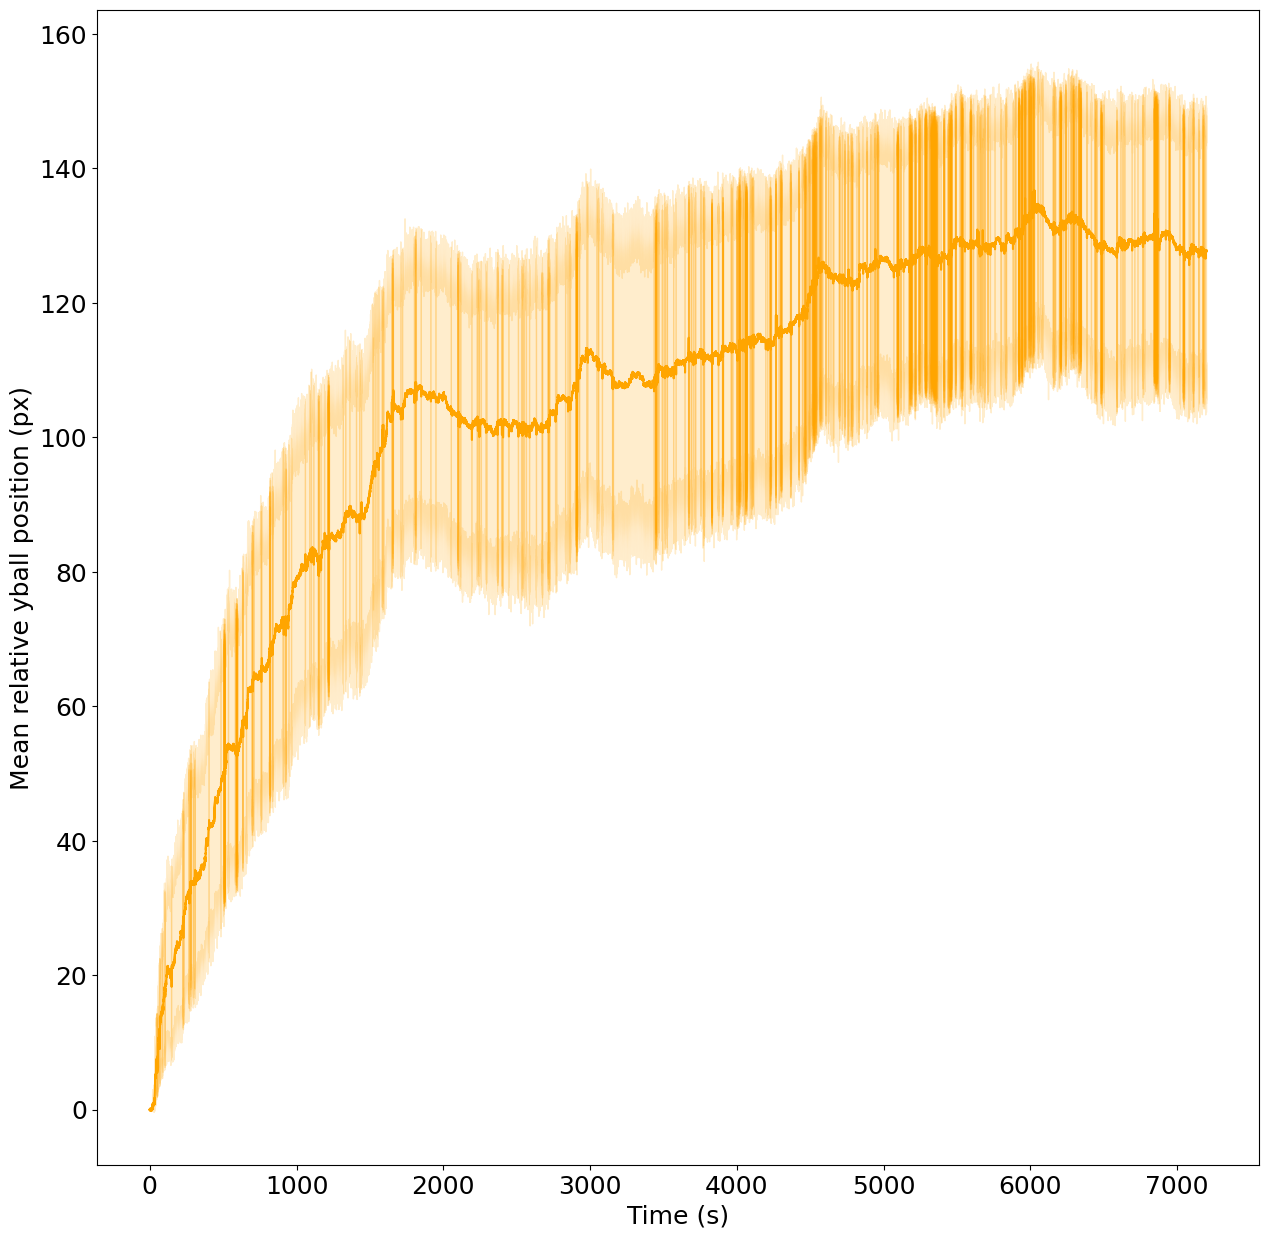

In [14]:
# Adjust plot size to make everything bigger
plt.rcParams['figure.figsize'] = [15, 15]
# Change font size accordingly
plt.rcParams.update({'font.size': 18})

# Compute mean relative yball position across flies for each time point
df2_mean = df2.groupby('time').mean().reset_index()

df2_mean["ci_lower"] = Confints_process2["ci_lower"]
df2_mean["ci_upper"] = Confints_process2["ci_upper"]

# Compute upper and lower confidence intervals
# (replace this with your own code to compute the confidence intervals)
upper2 = Grouped2['ci_upper']
lower2 = Grouped2['ci_lower']

# Plot the mean relative yball position as function of time and display it
plt.plot(df2_mean['time'], df2_mean['yball_relative'], color='orange')
plt.fill_between(df2_mean['time'], lower2, upper2, alpha=0.2, color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Mean relative yball position (px)')

Text(0, 0.5, 'Mean relative yball position (px)')

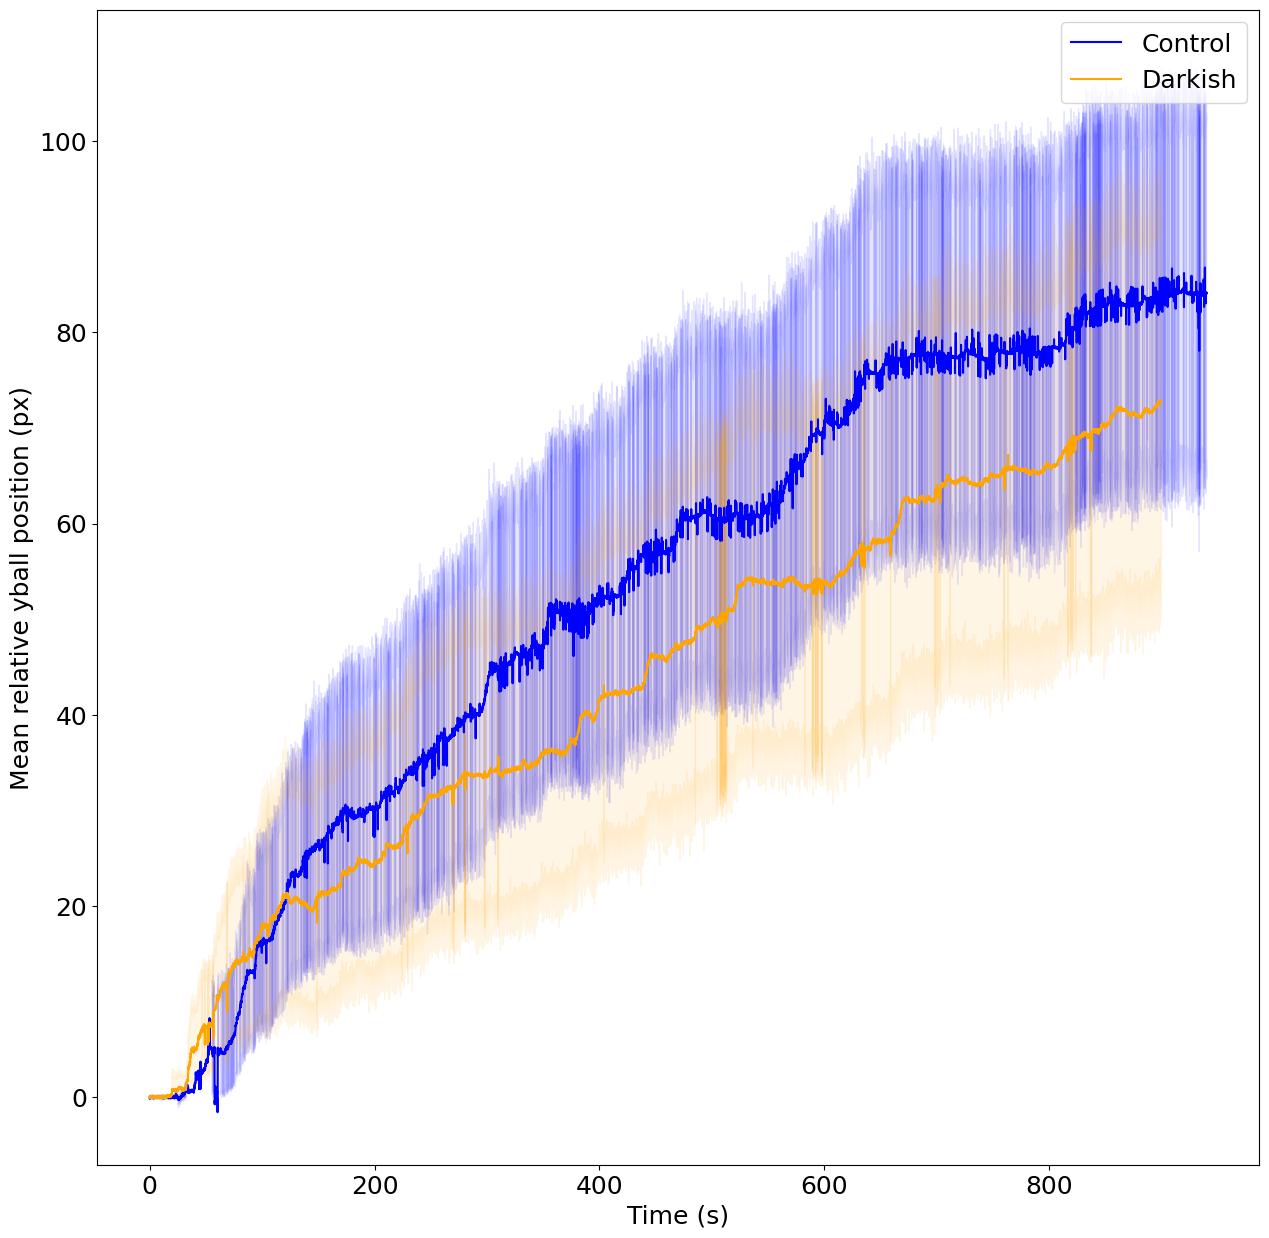

In [ ]:
# plot both df1 and df2 mean curves with confidence intervals on the same plot

plt.plot(df_mean['time'], df_mean['yball_relative'], color='blue')

plt.plot(df2_mean['time'], df2_mean['yball_relative'], color='orange')
plt.legend(['Control', 'Darkish'])
plt.fill_between(df_mean['time'], lower, upper, alpha=0.1, color='blue')
plt.fill_between(df2_mean['time'], lower2, upper2, alpha=0.1, color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Mean relative yball position (px)')
# Add a legend with blue bar being control and orange bar being darkish


Saving

In [16]:
savepath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets")

In [17]:
checksave(
    path=savepath.joinpath("230606_Darkish_1_Averaged.feather"),
    object="dataframe",
    file=df2_mean,
)

 I added a small change here